#Project 1

Our dataset deals contains many sttributes that we will be using to find the most important factors in someone having diabetes. Diabetes is "a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces"(World Health Organization). It is the seventh ranked cause of death in America(National Center for Health Statistics). Our dataset has 11 attributes as follows:

* `Pregnancies` - The number of pregnancies a person has had.
* `Glucose` - Glucose levels (blood sugar levels) refer to the amount of glucose (a type of sugar) present in a person's blood, (mg/dL).
* `DiaBloodPressurestolic`- The pressure a person's blood is pushing against their artery walls when the heart beats
* `Skinfold` - The measurement areas of skin that naturally fold, often used to measure body fat thickness
* `Insulin`- Insulin levels(the amount of insulin present in the bloodstream). Insulin regulates blood sugar levels by facilitating glucose uptake into cells.
* `BMI`- Body mass index is a measure that uses height and weight to estimate body fat. Formula: $ weight (kg) / height (m^2)$.
* `DiabetesPedigreeFunction`- Is a score used to understand genetic inheritance patterns and identify potential risk factors.
* `Age`- What age is the person?
* `Outcome`: Class variable of (0 or 1) indicating whether the patient has diabetes (yes = 1) or not (no = 0).


## Part 1: Data Summary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from yellowbrick.classifier import ROCAUC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
filename='https://raw.githubusercontent.com/ChristianDLT2004/DataForCSCI381/refs/heads/main/diabetes.csv'
df = pd.read_csv(filename)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Data types for each attribute
print("--- Count for each Data type ---\n")
df.dtypes.value_counts()

--- Count for each Data type ---



,count
int64,7
float64,2


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There are no Nan values values that need to be imputed or filled.

## Part 2: EDA

In [ ]:
#check to see if there are duplicates
x = sum(df.duplicated())
print(f"The are {x} duplicates.")

The are 0 duplicates.


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Insight:
1. Describe Each Feature:
    * Mean, STD:
        * The average glucose level in this dataset is approximately 120.9 mg/dL, with a standard deviation of about 31.9 mg/dL, suggesting a fairly wide spread."
    * Min and Max:
        * The number of pregnancies ranges from 0 to a maximum of 17. While 0 pregnancies is valid, 17 is quite high, indicating a wide range in patient history.
    * `Glucose`:
        * Normal glucose range from 70 to 100 mg/dL
        * Prediabetes glucose range from 100 to 125 mg/dL
        * Diabetes glucose range from 126 mg/dL or higher
        * The minimum glucose level in this dataset is 0. Which is very dangerous for a person and can lead to serious complications, including coma and even death.
        * We can assume that the '0' here likely represents a missing or unrecorded value.
        * The max of 199 mg/dL is very high and concerning. Which could be a sign of hyperglycemia (high blood sugar).
    * `BloodPressure`:
        * 'Systolic blood pressure' is the top number, it measures the pressure in the arteries when the heart beats. 'Diastolic blood pressure' is the bottom number, it measures the pressure when the heart rests between beats.
        * Normal blood pressure is around 120/80 mm Hg.
        * Low blood pressure is 90/60 mm Hg or lower. Any lower and it can be dangerous.
        * High Blood Pressure is around 140/90 mmHG or higer
        * Similar to glucose, a minimum blood pressure of 0 mm Hg can mean a person's heart has stopped.
        * We can assume that the '0' here likely represents missing data or an error in the reading.
    * `SkinThickness`:
        * A skin thickness of 0 mm is impossible.
        * The thinnest a skin can be is around 0.5 mm thick which are the eyelids.
        * This suggests missing data or error.
    * `Insulin`:
        * An insulin level of 0 mu U/ml is rare and usually associated with severe health conditions.
        * Another assumption could be missing data.
        * Normal insulin range can range from 5-15 μU/mL
        * Extremely high insulin levels like 846 μU/mL can suggest severe insulin resistance or a condition called hyperinsulinemia, where the body produces too much insulin.
    * `BMI`:
        * A BMI of 0 is impossible for a person.
        * Normal BMI ranges from 18.5 to 24.9.
        * Values below 18.5 are underweight, and above 25 are overweight/obese.
        * A max BMI of 67.1 is extremely high, indicating severe obesity, a major risk factor for type 2 diabetes.
        * The 0's could be indicated as missing values.
    * 25%, 50% (Median), 75% (Quartiles):
        * Insulin has a mean of ~80 but a median of ~30.5, indicating a strong positive skew with many lower values and some very high outliers.
        * It suggests that the distribution of these feature might be skewed.
2. Overall Observations:
   * Our initial thoughts are that the dataset appears to be relatively clean, but some features have values that might require attention due to their clinical impossibility.

In [ ]:
df_numerical = df[['Pregnancies', 'Glucose', 'BloodPressure',
                  'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_categorical = df[['Outcome']]

In [ ]:
print("--- Checking for Negative Values ---\n")

# List of numerical columns where negative values would be invalid
# 'Outcome' not included since it only 1 and 0 values.

found_negative_values = False

for col in df_numerical:
    # Select rows where the current column has a value less than 0
    negative_rows = df[df[col] < 0]

    if not negative_rows.empty:
        print(f"\n--- Found Negative Values in Column: '{col}' ---")
        print(negative_rows)
        found_negative_values = True
    else:
        print(f"No negative values found in column: '{col}'")

if not found_negative_values:
    print("\nConclusion: No negative values were found in any of the checked numerical columns.")
else:
    print("\nAction Required: Investigate these negative values as they likely indicate data errors.")

--- Checking for Negative Values ---

No negative values found in column: 'Pregnancies'
No negative values found in column: 'Glucose'
No negative values found in column: 'BloodPressure'
No negative values found in column: 'SkinThickness'
No negative values found in column: 'Insulin'
No negative values found in column: 'BMI'
No negative values found in column: 'DiabetesPedigreeFunction'
No negative values found in column: 'Age'

Conclusion: No negative values were found in any of the checked numerical columns.


In [ ]:
print("--- Checking for zero Values ---\n")

cols_to_check_for_zeros = ['Glucose', 'BloodPressure',
                           'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

total_rows = len(df)
found_zeros = False

print(f"Total number of rows in the dataset: {total_rows}\n")

for col in cols_to_check_for_zeros:
    zero_count = (df[col] == 0).sum()

    if zero_count > 0:
        found_zeros = True
        percentage_zeros = (zero_count / total_rows) * 100
        print(f"Column '{col}':")
        print(f"  - Number of 0 values: {zero_count}")
        print(f"  - Percentage of 0 values: {percentage_zeros:.2f}%")
        print("-" * 30)
    else:
        print(f"Column '{col}': No 0 values found (excluding valid 0s like in 'Pregnancies').")
        print("-" * 30)

if not found_zeros:
    print("\nConclusion: No problematic zero values were found in the specified columns.")
else:
    print("\nConclusion: Problematic zero values were found. These will need to be addressed during feature engineering/imputation.")

--- Checking for zero Values ---

Total number of rows in the dataset: 768

Column 'Glucose':
  - Number of 0 values: 5
  - Percentage of 0 values: 0.65%
------------------------------
Column 'BloodPressure':
  - Number of 0 values: 35
  - Percentage of 0 values: 4.56%
------------------------------
Column 'SkinThickness':
  - Number of 0 values: 227
  - Percentage of 0 values: 29.56%
------------------------------
Column 'Insulin':
  - Number of 0 values: 374
  - Percentage of 0 values: 48.70%
------------------------------
Column 'BMI':
  - Number of 0 values: 11
  - Percentage of 0 values: 1.43%
------------------------------
Column 'DiabetesPedigreeFunction': No 0 values found (excluding valid 0s like in 'Pregnancies').
------------------------------
Column 'Age': No 0 values found (excluding valid 0s like in 'Pregnancies').
------------------------------

Conclusion: Problematic zero values were found. These will need to be addressed during feature engineering/imputation.


--- Histograms of Numerical Features ---



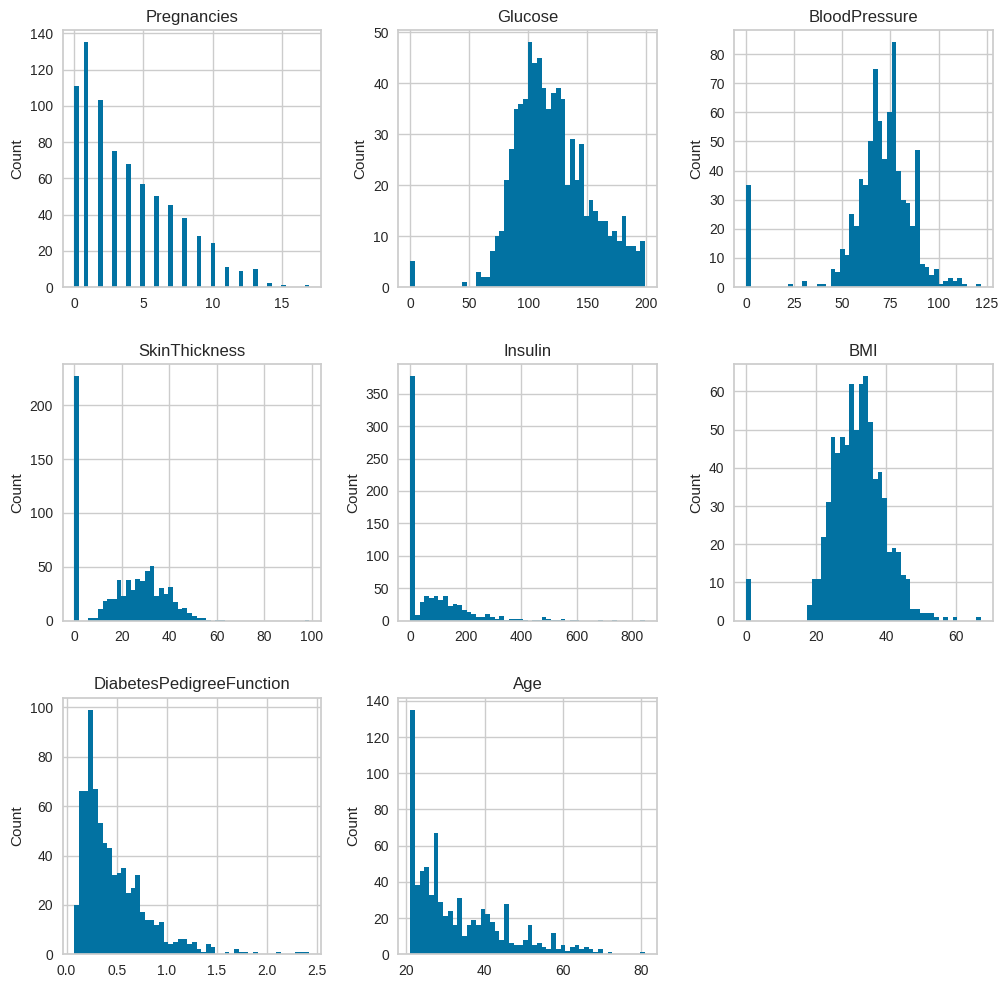

In [ ]:
print("--- Histograms of Numerical Features ---\n")
axes = df_numerical.hist(bins=50, figsize=(12,12))
# To iterate through all the plots
for ax in axes.flatten():
    ax.set_ylabel('Count')
plt.show()

--- Plotbox of Numerical Features ---



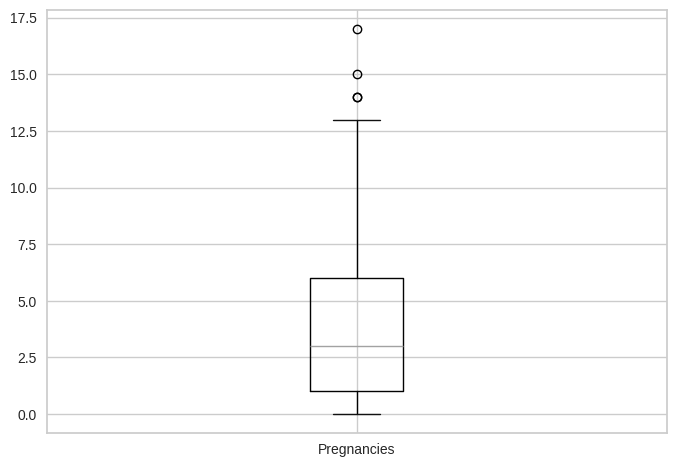

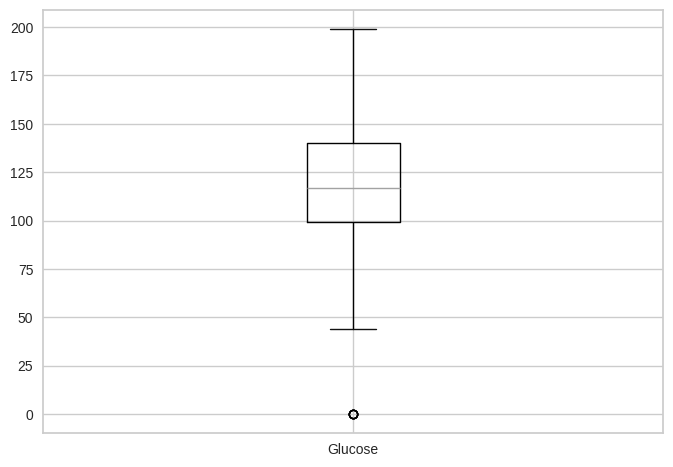

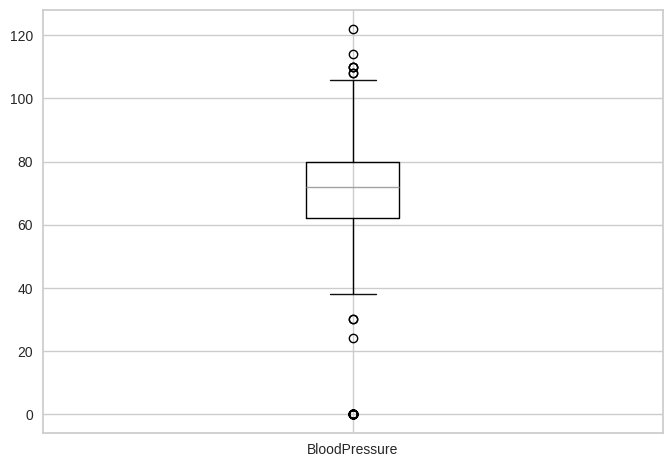

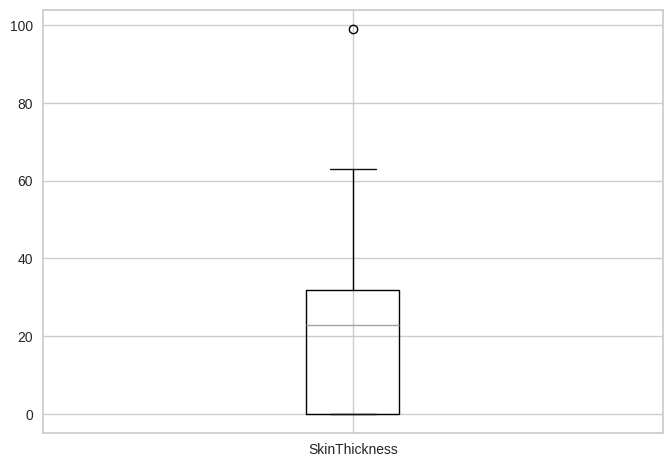

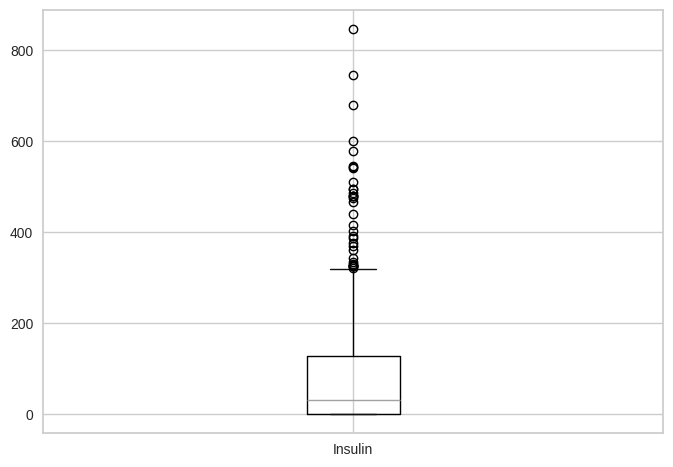

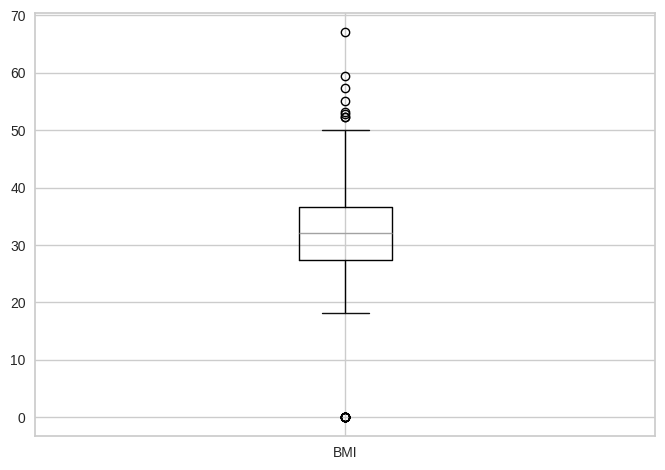

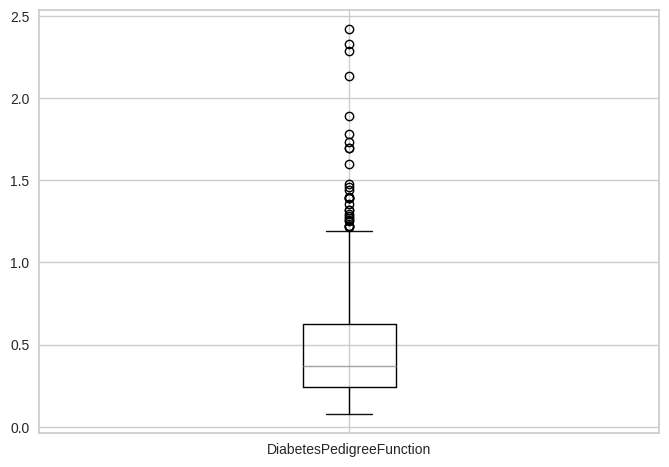

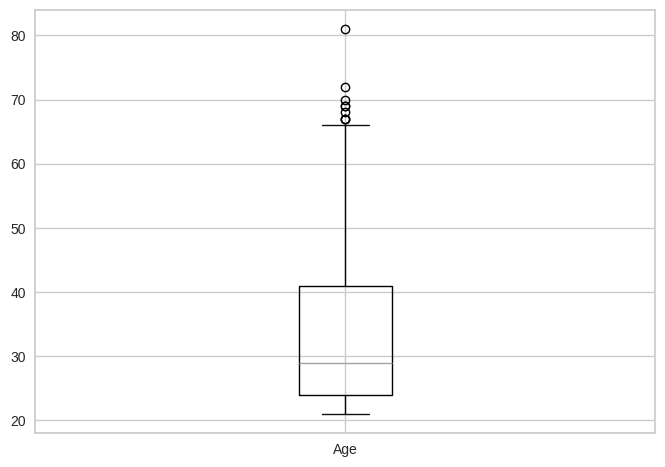

In [ ]:
# for col_name in df_numerical:
print("--- Plotbox of Numerical Features ---\n")
for col in df_numerical:
  df_numerical.boxplot(column=col)
  plt.show()

There are a lot of outliers found in our box plots, so the next steps is possibly getting rid of all these outliers to able to run logistic regression.

* There is something most likely wrong with skinfold and insulin as they contain 0, but upon further research this is impossible.
* This will be changed to Nan when performing Feature Engineering and Imputation.

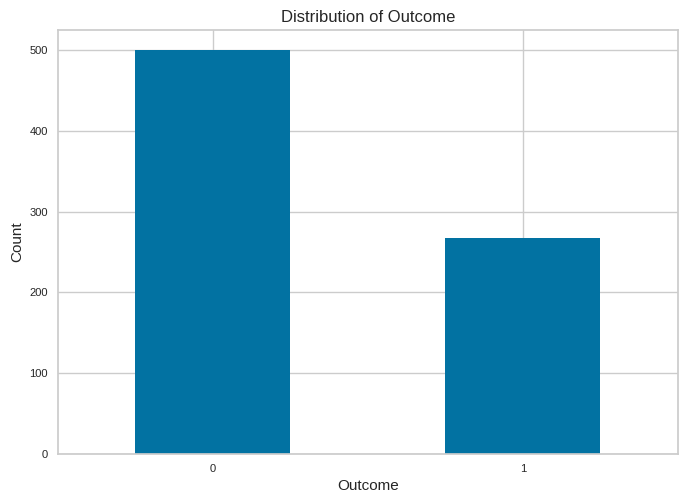

In [ ]:
for col_name in df_categorical:
# rot=0 to keep labels horizontal
  df_categorical[col_name].value_counts().plot(kind='bar', fontsize = 8, rot=0)
  plt.title(f'Distribution of {col_name}')
  plt.ylabel('Count')
  plt.show()

There is a lot more 0 than 1 in 'class', which may cause our models to be bias towards the 0(the majority class).

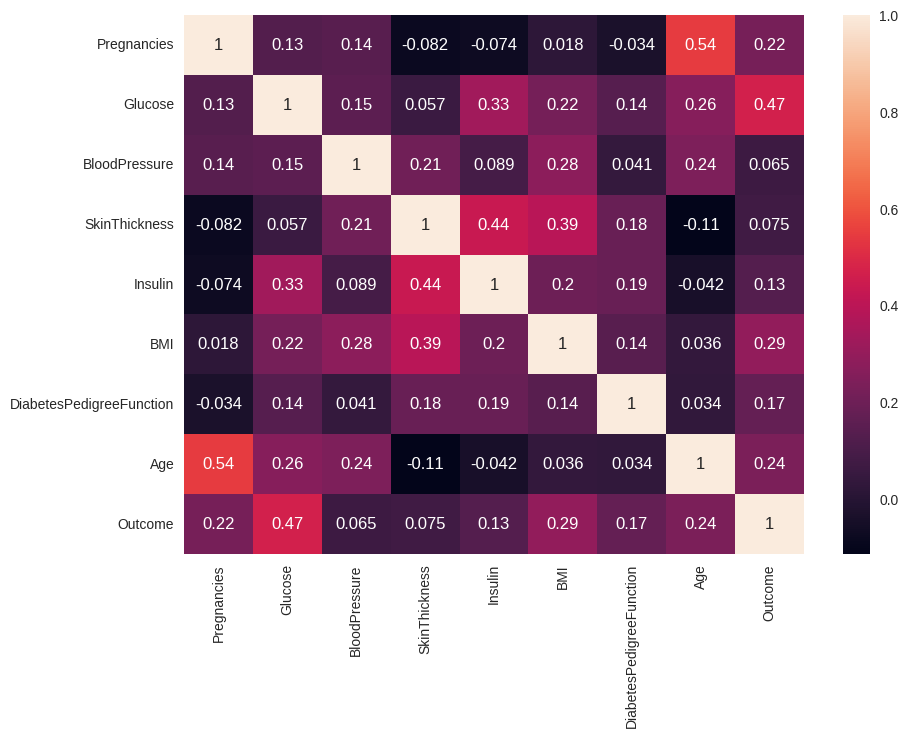

In [ ]:
corrMatrix = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

* According to this, glucose levels, age, and bmi is found to be most correlated with class.
* Pregnancies and Age are strongly correlated with each other.
* The next step will to try and see if removing outliers, will help increase the correlations with class.

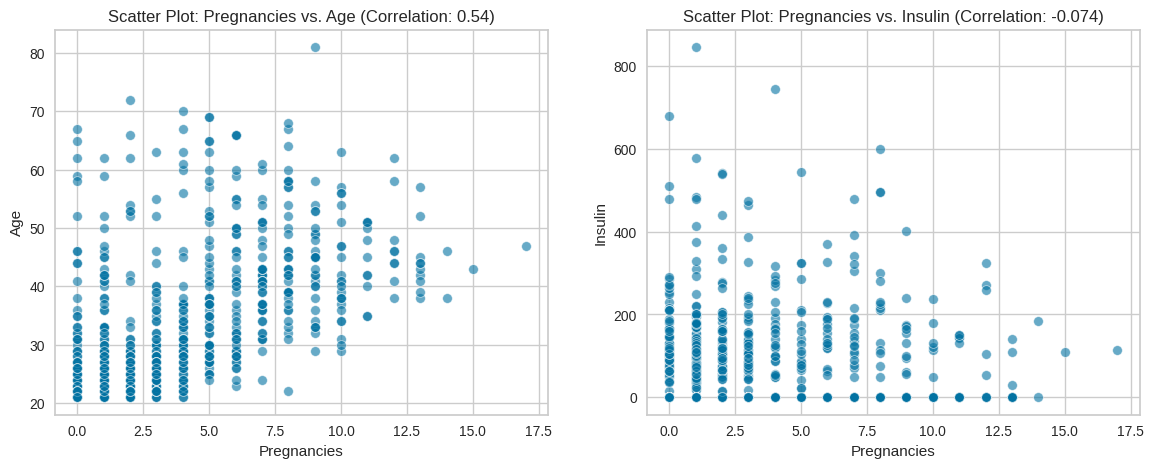

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1) # 1st plot
sns.scatterplot(x='Pregnancies', y='Age', data=df, alpha=0.6)
plt.title('Scatter Plot: Pregnancies vs. Age (Correlation: 0.54)')
plt.xlabel('Pregnancies')
plt.ylabel('Age')

plt.subplot(1, 2, 2) # 2nd plot
sns.scatterplot(x='Pregnancies', y='Insulin', data=df, alpha=0.6)
plt.title('Scatter Plot: Pregnancies vs. Insulin (Correlation: -0.074)')
plt.xlabel('Pregnancies')
plt.ylabel('Insulin')

plt.show()

## Part 3: Data Preperation

In [ ]:
#create a copy of the dataframe with selected columns
df_cleaned = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].copy()

In [ ]:
print("--- df_cleaned Info ---\n")
df_cleaned.info()

--- df_cleaned Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Since these values are impossible, fill with Nan
cols_to_impute_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_cleaned[cols_to_impute_zeros] = df_cleaned[cols_to_impute_zeros].replace(0, np.nan)

In [ ]:
print("--- After replacing 0s with NaN in df_cleaned ---\n")
df_cleaned.isnull().sum()

--- After replacing 0s with NaN in df_cleaned ---



,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
print("--- df_cleaned.describe() after NaN replacement ---\n")
df_cleaned.describe()

--- df_cleaned.describe() after NaN replacement ---



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("--- Re-Checking for zero Values ---\n")

remaining_zeros_found = False

for col in cols_to_impute_zeros:
    # Count how many 0s are left in each of these columns in df_cleaned
    zero_count = (df_cleaned[col] == 0).sum()

    if zero_count > 0:
        print(f"WARNING: Column '{col}' still has {zero_count} zero values after replacement.")
        remaining_zeros_found = True
    else:
        print(f"Column '{col}': No 0 values found. (Replacement successful)")

if not remaining_zeros_found:
    print("\nConfirmation: All problematic 0 values have been successfully replaced with NaN.")
else:
    print("\nAction Required: Investigate why zeros remain in the listed columns.")

--- Re-Checking for zero Values ---

Column 'Glucose': No 0 values found. (Replacement successful)
Column 'BloodPressure': No 0 values found. (Replacement successful)
Column 'SkinThickness': No 0 values found. (Replacement successful)
Column 'Insulin': No 0 values found. (Replacement successful)
Column 'BMI': No 0 values found. (Replacement successful)

Confirmation: All problematic 0 values have been successfully replaced with NaN.


In [ ]:
def remove_outliers_iqr(df, threshold=1.5):
    df_numeric = df.select_dtypes(include=['number'])
    q1 = df_numeric.quantile(0.25)
    q3 = df_numeric.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[((df_numeric >= lower_bound) & (df_numeric <= upper_bound)).all(axis=1)]
df_cleaned = remove_outliers_iqr(df_cleaned)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               338 non-null    int64  
 1   Glucose                   338 non-null    float64
 2   BloodPressure             338 non-null    float64
 3   SkinThickness             338 non-null    float64
 4   Insulin                   338 non-null    float64
 5   BMI                       338 non-null    float64
 6   DiabetesPedigreeFunction  338 non-null    float64
 7   Age                       338 non-null    int64  
 8   Outcome                   338 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 26.4 KB


In [ ]:
print("--- Re-checking to show no NaN values ---/n")
df_cleaned.isnull().sum()

--- Re-checking to show no NaN values ---/n


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


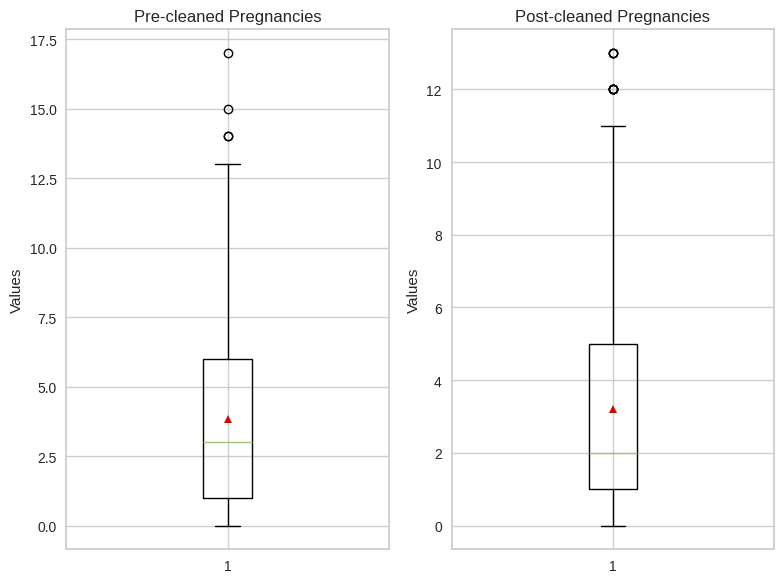

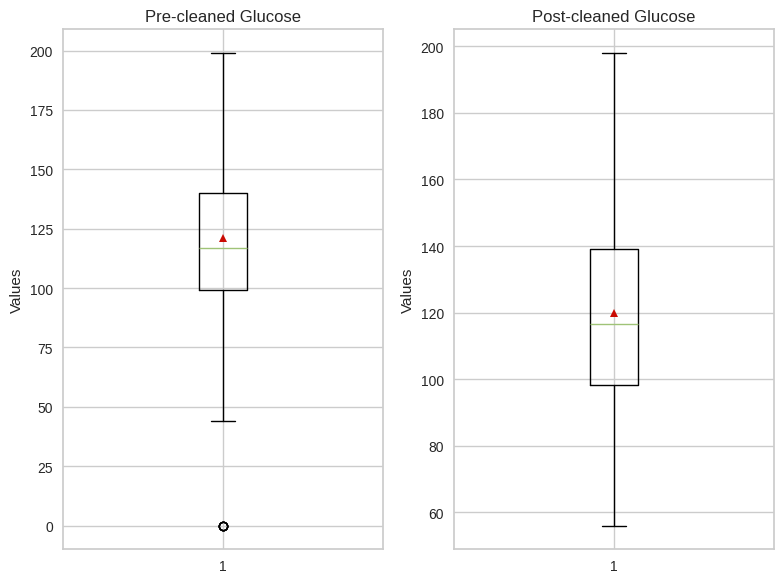

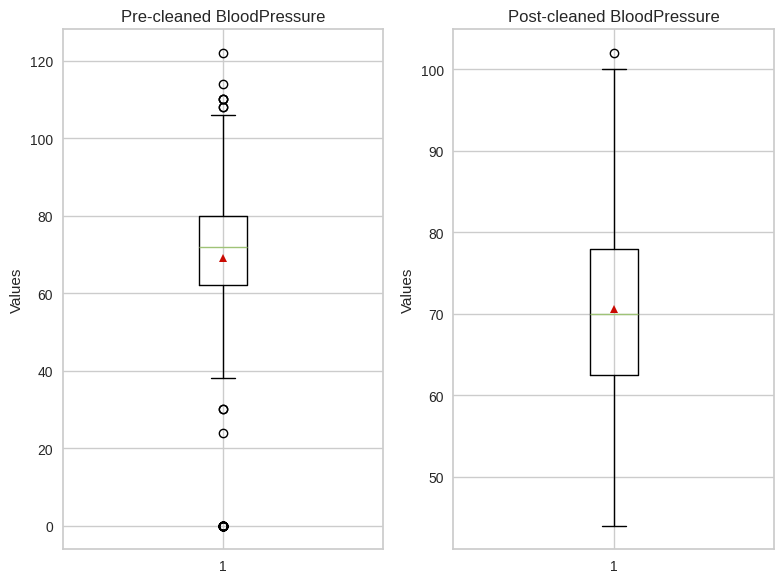

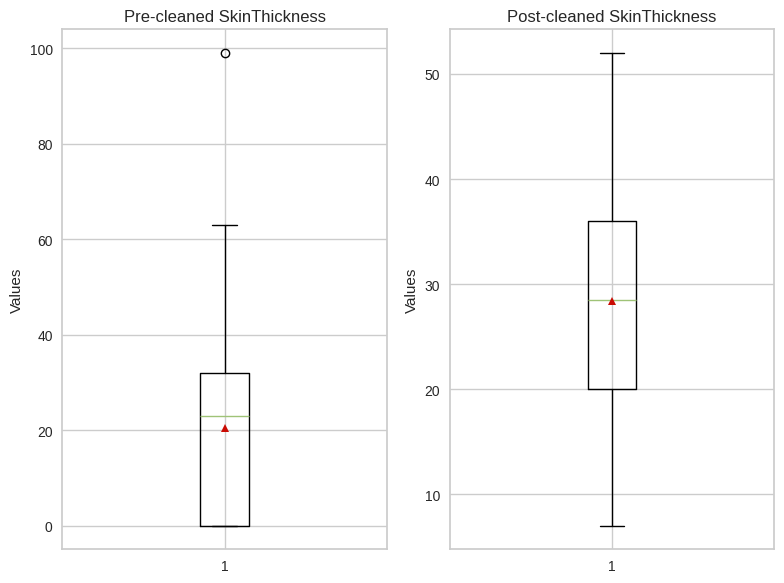

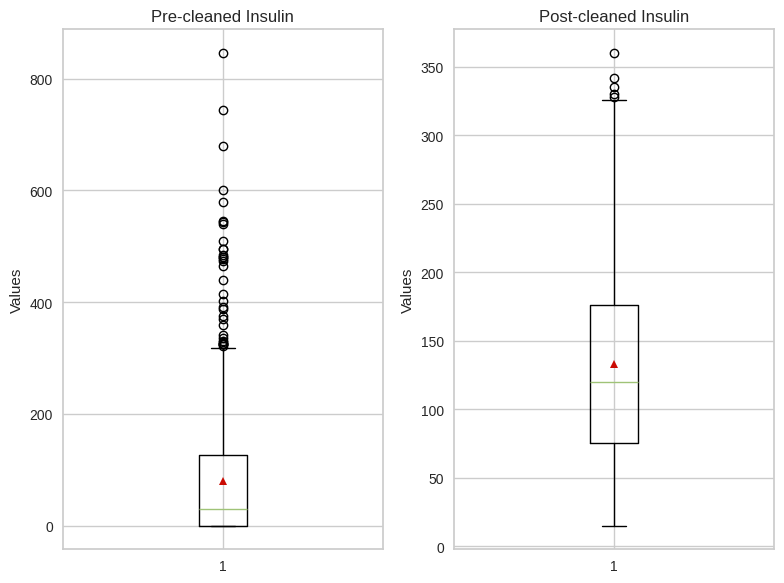

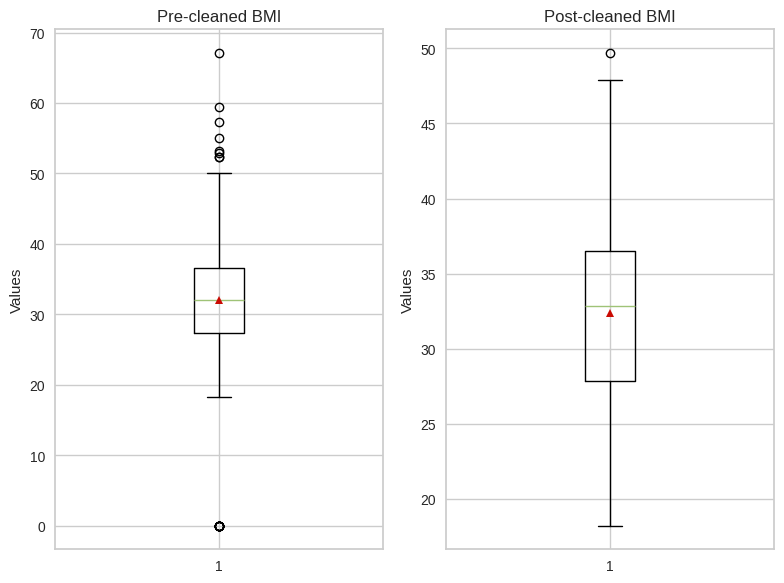

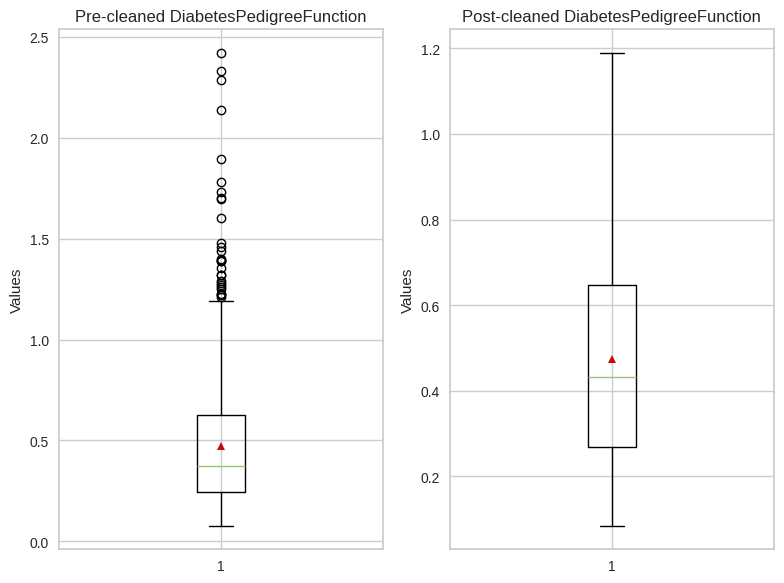

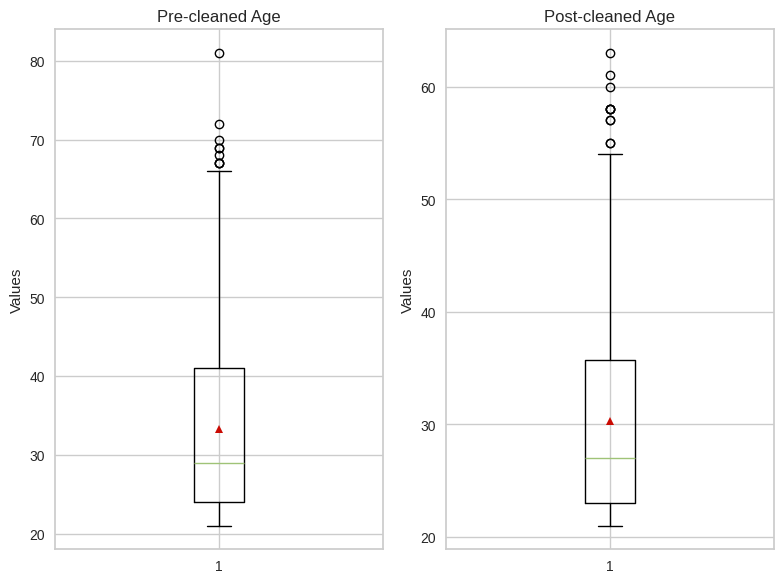

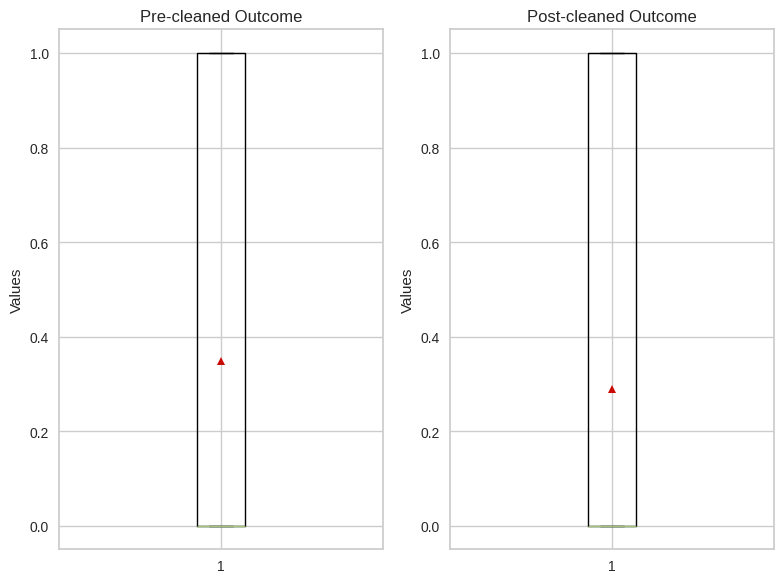

In [ ]:
for i in df_cleaned:
  # Create the figure and subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

  # Create box plot on the first subplot
  ax1.boxplot(df[i], showmeans=True)
  ax1.set_title('Pre-cleaned ' + i)
  ax1.set_ylabel('Values')

  # Create box plot on the second subplot
  ax2.boxplot(df_cleaned[i], showmeans=True)
  ax2.set_title('Post-cleaned ' + i)
  ax2.set_ylabel('Values')

  # Adjust layout and display
  plt.tight_layout()
  plt.show()

In [ ]:
# we don't have this feature anymore - replace it with what?
# df['class'].value_counts().plot(kind='bar', fontsize=8, rot=0)
# plt.show()

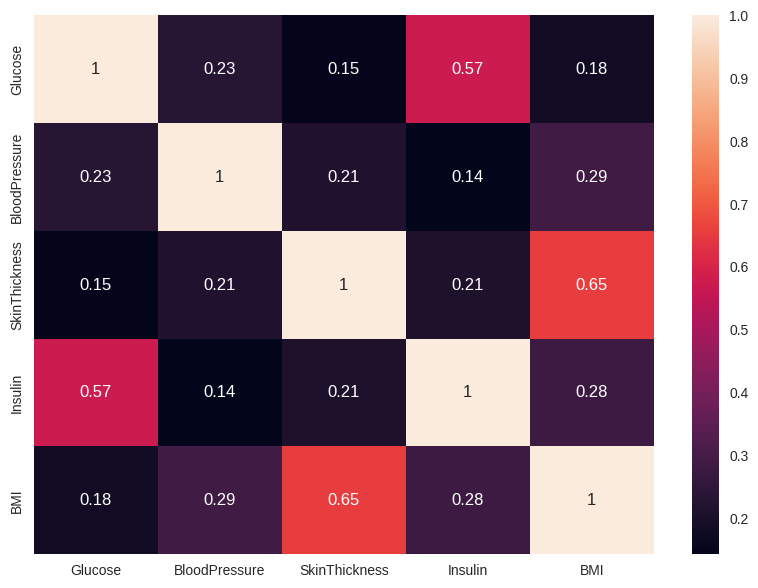

In [ ]:
corrMatrix1 = df_cleaned[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix1, annot=True)
plt.show()

This approach drops too much data and makes our correlations with class decrease mostly. Something interesting I found is that this approach ends up decreasing the count of people that had diabetes, but not as much those that did not have diabetes. This makes sense as outliers in glucose levels indicate high blood sugar and high blood sugar are common in people with diabetes. In this case, outliers should be kept in our data due to their correlation with diabetes.

The next approach will be to use KBinsDiscretizer to deal with outliers and use KNNImputer to fill the wrong values in 'skinfold' and 'insulin'.

In [ ]:
df_cleaned1=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']].copy()

In [ ]:
#Since these values are impossible, fill with Nan
columns_with_missing = ['Glucose', 'SkinThickness']
df_cleaned1[columns_with_missing] = df_cleaned1[columns_with_missing].replace(0, np.nan)

#Use KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_cleaned1 = pd.DataFrame(imputer.fit_transform(df_cleaned1), columns=df_cleaned1.columns)

In [ ]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
df_cleaned1[columns_with_missing].describe()

,Glucose,SkinThickness
count,768.000000,768.000000
mean,121.671615,29.017969
std,30.474936,9.327999
min,44.000000,7.000000
25%,99.000000,22.650000
50%,117.000000,29.000000
75%,140.250000,35.000000
max,199.000000,99.000000


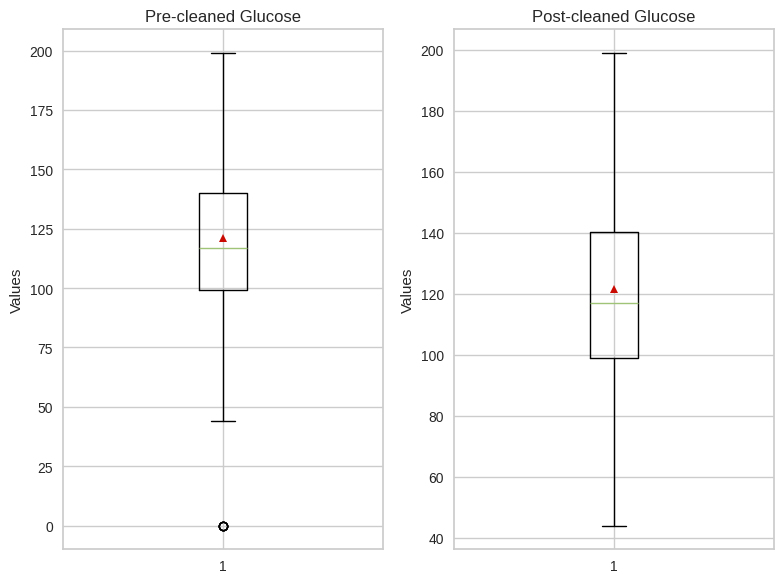

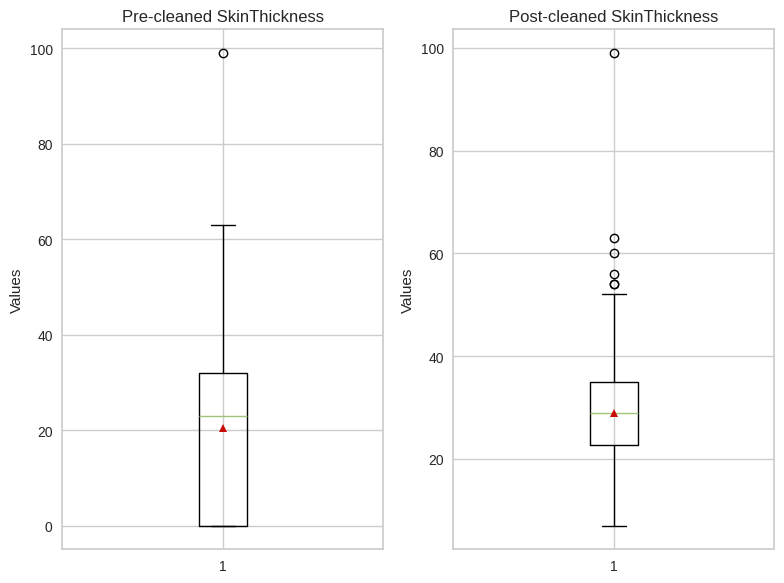

In [ ]:
for i in columns_with_missing:
  # Create the figure and subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

  # Create box plot on the first subplot
  ax1.boxplot(df[i], showmeans=True)
  ax1.set_title('Pre-cleaned ' + i)
  ax1.set_ylabel('Values')

  # Create box plot on the second subplot
  ax2.boxplot(df_cleaned1[i], showmeans=True)
  ax2.set_title('Post-cleaned ' + i)
  ax2.set_ylabel('Values')

  # Adjust layout and display
  plt.tight_layout()
  plt.show()

* We see that we fixed the outlier for `Glucose` when replacing 0's with NaN
* We see that more outliers in `SkinThickness` were added when replacing 0's with NaN

In [ ]:
kbd1 = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')

# Apply to a single column (e.g., 'income') and transform
df_cleaned1['insulin_binned'] = kbd1.fit_transform(df_cleaned1[['Insulin']])

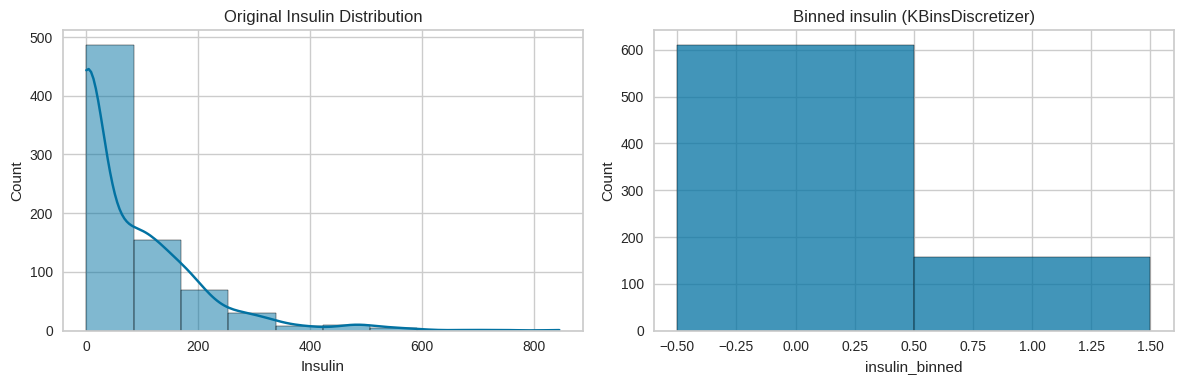

In [ ]:
# Plot original vs. binned
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Original distribution
sns.histplot(df_cleaned1['Insulin'], bins=10, kde=True, ax=ax[0])
ax[0].set_title('Original Insulin Distribution')

# Binned distribution
sns.histplot(df_cleaned1['insulin_binned'], bins=6, discrete=True, ax=ax[1])
ax[1].set_title('Binned insulin (KBinsDiscretizer)')

plt.tight_layout()
plt.show()

In [ ]:
kbd2 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')  # or 'quantile', 'kmeans'

# Apply to a single column (e.g., 'income') and transform
df_cleaned1['glucose_binned'] = kbd2.fit_transform(df_cleaned1[['Glucose']])

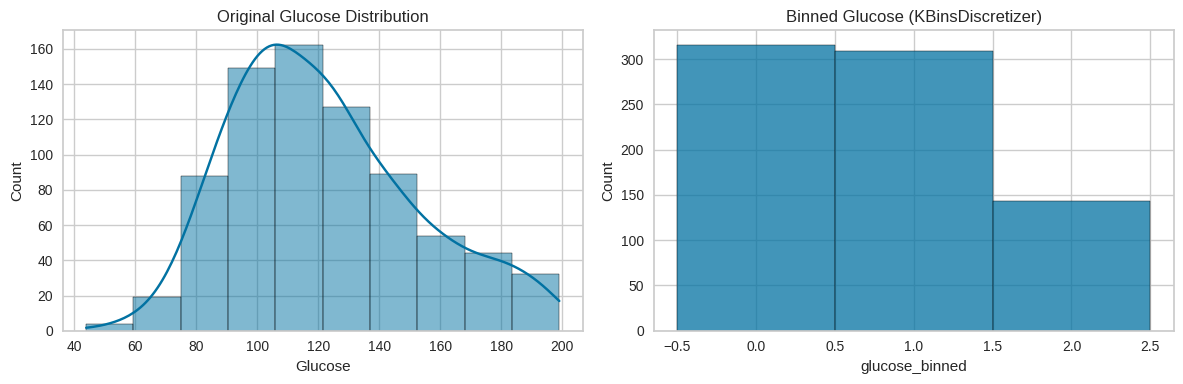

In [ ]:
# Plot original vs. binned
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Original distribution
sns.histplot(df_cleaned1['Glucose'], bins=10, kde=True, ax=ax[0])
ax[0].set_title('Original Glucose Distribution')

# Binned distribution
sns.histplot(df_cleaned1['glucose_binned'], bins=3, discrete=True, ax=ax[1])
ax[1].set_title('Binned Glucose (KBinsDiscretizer)')

plt.tight_layout()
plt.show()

In [ ]:
df_cleaned1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin_binned,glucose_binned
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.671615,69.105469,29.017969,79.799479,31.992578,0.471876,33.240885,0.348958,0.204427,0.774740
std,3.369578,30.474936,19.355807,9.327999,115.244002,7.884160,0.331329,11.760232,0.476951,0.403545,0.740018
min,0.000000,44.000000,0.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,22.650000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,35.000000,127.250000,36.600000,0.626250,41.000000,1.000000,0.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000,2.000000


Upon taking care of incorect values by imputing and creating bins for glucose and insuling for thier outliers, there has a huge increase in the correlations with class. The new binned variables have a greater than .3 correlation with class meaning they are highly correlated.

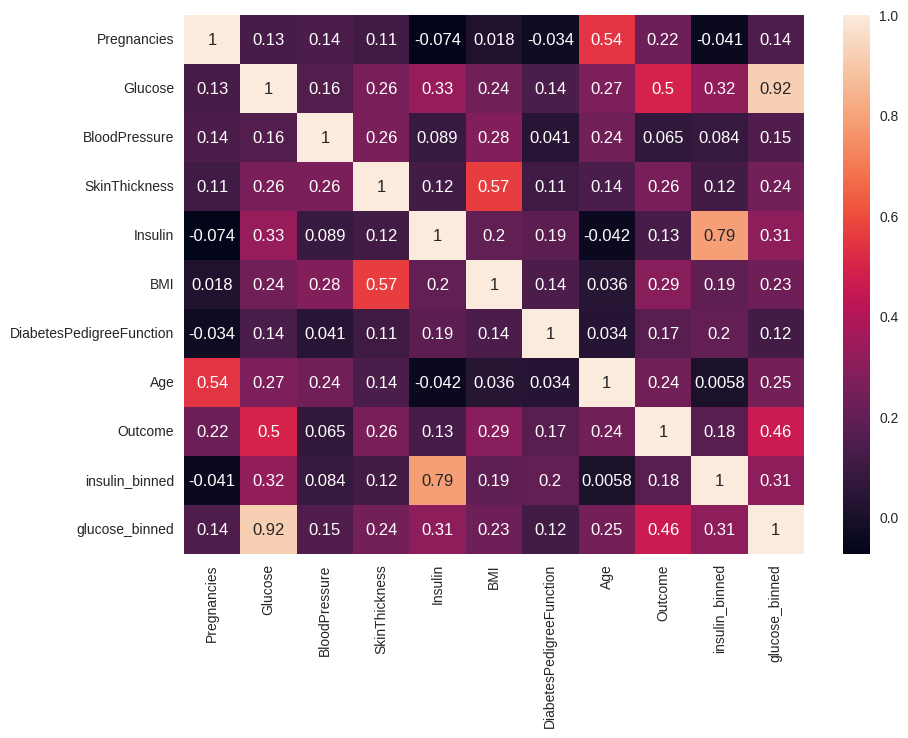

In [ ]:
corrMatrix1 = df_cleaned1.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix1, annot=True)
plt.show()

### Feature Enginering
* Statistical Methods
  - Pearson
  - Chi Square
* Wrapper Methods using Recursive Feature Elimination (RFE)

In [ ]:
# Pearson
from scipy.stats import pearsonr

# Sample DataFrame
X_df_cleaned_stat = df_cleaned[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_df_cleaned_stat = df_cleaned['Outcome']

In [ ]:
X_df_cleaned_stat.shape
y_df_cleaned_stat.shape

(338,)

In [ ]:
#df = pd.DataFrame(filename)

# Pearson correlation test
for col in X_df_cleaned_stat.columns:
  corr_coefficient, p_value = pearsonr(X_df_cleaned_statt[column], y_df_cleaned_statt[column])

# Output the results
  print(f"Pearson Correlation Coefficient: {corr_coefficient}")
  print(f"P-value: {p_value}")

NameError: name 'X_df_cleaned_statt' is not defined

In [ ]:
# Chi Square

#### RFE on df_cleaned
* This version of `df_cleaned` has rows with NaNs and outliers removed, resulting in a smaller dataset.

In [ ]:
# Define features and target
features_for_rfe = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

In [ ]:
print(f"--- Running RFE on existing df_cleaned (Shape: {df_cleaned.shape}) ---")

--- Running RFE on existing df_cleaned (Shape: (338, 9)) ---


In [ ]:
X_df_cleaned = df_cleaned[features_for_rfe]
y_df_cleaned = df_cleaned[target]

# --- Data Scaling ---
scaler_df_cleaned = StandardScaler()
X_scaled_df_cleaned = scaler_df_cleaned.fit_transform(X_df_cleaned)
X_scaled_df_cleaned_df = pd.DataFrame(X_scaled_df_cleaned, columns=features_for_rfe)

In [ ]:
# --- RFE Setup and Fit ---
model_rfe_df_cleaned = LogisticRegression(solver='liblinear', max_iter=200, random_state=42)
n_features_to_select = 5 # Adjust as needed
rfe_selector_df_cleaned = RFE(estimator=model_rfe_df_cleaned, n_features_to_select=n_features_to_select, step=1)
rfe_selector_df_cleaned.fit(X_scaled_df_cleaned_df, y_df_cleaned)

# --- Results ---
selected_features_df_cleaned = X_scaled_df_cleaned_df.columns[rfe_selector_df_cleaned.support_].tolist()
feature_ranking_df_cleaned = rfe_selector_df_cleaned.ranking_

print(f"--- RFE Results on df_cleaned (After Outlier Removal, {df_cleaned.shape[0]} rows) ---\n")
print("Selected Features by RFE:")
print(selected_features_df_cleaned)
print("\nFeature Ranking (1 = selected, higher number = less important):\n")
rfe_ranks_df_cleaned = pd.DataFrame({
    'Feature': features_for_rfe,
    'Rank': feature_ranking_df_cleaned
}).sort_values(by='Rank').reset_index(drop=True)
print(rfe_ranks_df_cleaned)
print("\n" + "="*80 + "\n")

--- RFE Results on df_cleaned (After Outlier Removal, 338 rows) ---

Selected Features by RFE:
['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Feature Ranking (1 = selected, higher number = less important):

                    Feature  Rank
0                   Glucose     1
1             SkinThickness     1
2  DiabetesPedigreeFunction     1
3                       BMI     1
4                       Age     1
5               Pregnancies     2
6                   Insulin     3
7             BloodPressure     4




**RFE on df_cleaned (after Outlier Removal of 314 rows)**

* This RFE run is performed on (df_cleaned) where initial 0 values were treated as NaNs and statistical outliers were removed by dropping the entire rows that contained them. This resulted in a significantly smaller dataset of only 314 rows from the original 768.

* The purpose was to see which features are deemed important for prediction when using a highly "cleaned" but substantially reduced dataset.

#### RFE with df_cleaned1
* This version of `df_cleaned1` retains all rows and uses KNN Imputer to fill missing values.
* We'll use the original 8 numerical features, excluding the binned ones for this RFE run.

In [ ]:
print(f"--- Running RFE on existing df_cleaned1 (Shape: {df_cleaned1.shape}) ---")

--- Running RFE on existing df_cleaned1 (Shape: (768, 11)) ---


In [ ]:
X_df_cleaned1_original = df_cleaned1[features_for_rfe]
y_df_cleaned1_original = df_cleaned1[target]

# --- Data Scaling ---
scaler_df_cleaned1_original = StandardScaler()
X_scaled_df_cleaned1_original = scaler_df_cleaned1_original.fit_transform(X_df_cleaned1_original)
X_scaled_df_cleaned1_original_df = pd.DataFrame(X_scaled_df_cleaned1_original, columns=features_for_rfe)

In [ ]:
# --- RFE Setup and Fit ---
model_rfe_df_cleaned1_original = LogisticRegression(solver='liblinear', max_iter=200, random_state=42)
n_features_to_select = 5 # Adjust as needed
rfe_selector_df_cleaned1_original = RFE(estimator=model_rfe_df_cleaned1_original,
                                        n_features_to_select=n_features_to_select, step=1)
rfe_selector_df_cleaned1_original.fit(X_scaled_df_cleaned1_original_df, y_df_cleaned1_original)

# --- Results  ---
selected_features_df_cleaned1_original = X_scaled_df_cleaned1_original_df.columns[rfe_selector_df_cleaned1_original.support_].tolist()
feature_ranking_df_cleaned1_original = rfe_selector_df_cleaned1_original.ranking_

print(f"\n=== RFE Results on df_cleaned1 (After KNN Imputation, Original Features, {df_cleaned1.shape[0]} rows) ===")
print("Selected Features by RFE:")
print(selected_features_df_cleaned1_original)
print("\nFeature Ranking (1 = selected, higher number = less important):")
rfe_ranks_df_cleaned1_original = pd.DataFrame({
    'Feature': features_for_rfe,
    'Rank': feature_ranking_df_cleaned1_original
}).sort_values(by='Rank').reset_index(drop=True)
print(rfe_ranks_df_cleaned1_original)
print("\n" + "="*80 + "\n")


=== RFE Results on df_cleaned1 (After KNN Imputation, Original Features, 768 rows) ===
Selected Features by RFE:
['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']

Feature Ranking (1 = selected, higher number = less important):
                    Feature  Rank
0               Pregnancies     1
1                   Glucose     1
2             BloodPressure     1
3                       BMI     1
4  DiabetesPedigreeFunction     1
5                       Age     2
6                   Insulin     3
7             SkinThickness     4




**RFE on df_cleaned1 (After KNN Imputation, Original Features with 768 rows)**

* This RFE run uses the df_cleaned1 DataFrame, which has all 768 rows. Missing values (initial 0s treated as NaNs) were handled using K-Nearest Neighbors (KNN) imputation, which estimates missing values based on the values of their nearest neighbors. For this specific RFE run, only the original 8 numerical features are included.

* The purpose was to identify important features while preserving the full dataset size by intelligently filling missing values, and to see the importance of the raw, imputed features.

#### RFE with KBins
* This version of `df_cleaned1` retains all rows and uses KNN Imputer to fill missing values.
* We'll use the original 8 numerical features, excluding the binned ones for this RFE run.

In [ ]:
# We include the binned features in the list for RFE
features_for_rfe_binned = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
                           'insulin_binned', 'glucose_binned']

X_df_cleaned1_binned = df_cleaned1[features_for_rfe_binned]
y_df_cleaned1_binned = df_cleaned1[target]

# Data Scaling
scaler_df_cleaned1_binned = StandardScaler()
X_scaled_df_cleaned1_binned = scaler_df_cleaned1_binned.fit_transform(X_df_cleaned1_binned)
X_scaled_df_cleaned1_binned_df = pd.DataFrame(X_scaled_df_cleaned1_binned, columns=features_for_rfe_binned)

In [ ]:
# --- RFE Setup and Fit ---
model_rfe_df_cleaned1_binned = LogisticRegression(solver='liblinear', max_iter=200, random_state=42)
n_features_to_select = 5 # can be adjusted, since we have more features
rfe_selector_df_cleaned1_binned = RFE(estimator=model_rfe_df_cleaned1_binned,
                                      n_features_to_select=n_features_to_select, step=1)
rfe_selector_df_cleaned1_binned.fit(X_scaled_df_cleaned1_binned_df, y_df_cleaned1_binned)

# --- Results ---
selected_features_df_cleaned1_binned = X_scaled_df_cleaned1_binned_df.columns[rfe_selector_df_cleaned1_binned.support_].tolist()
feature_ranking_df_cleaned1_binned = rfe_selector_df_cleaned1_binned.ranking_

print(f"--- RFE Results on df_cleaned1 (After KNN Imputation + Binning, {df_cleaned1.shape[0]} rows) ---\n")
print("Selected Features by RFE:")
print(selected_features_df_cleaned1_binned)

print("\nFeature Ranking (1 = selected, higher number = less important):\n")
rfe_ranks_df_cleaned1_binned = pd.DataFrame({
    'Feature': features_for_rfe_binned,
    'Rank': feature_ranking_df_cleaned1_binned
}).sort_values(by='Rank').reset_index(drop=True)
print(rfe_ranks_df_cleaned1_binned)
print("\n" + "="*80 + "\n")

--- RFE Results on df_cleaned1 (After KNN Imputation + Binning, 768 rows) ---

Selected Features by RFE:
['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

Feature Ranking (1 = selected, higher number = less important):

                    Feature  Rank
0               Pregnancies     1
1                   Glucose     1
2                       BMI     1
3                   Insulin     1
4  DiabetesPedigreeFunction     1
5            insulin_binned     2
6             BloodPressure     3
7                       Age     4
8             SkinThickness     5
9            glucose_binned     6




**RFE on df_cleaned1 (After KNN Imputation + KBinsDiscretizer Features with 768 rows)**

* This RFE run also uses the full 768-row df_cleaned1 with KNN imputed values, but it additionally includes the two new engineered features: `insulin_binned` and `glucose_binned`, which were created using `KBinsDiscretizer`. This means RFE considers a total of 10 features for selection.

* The purpose was to determine if the binned, engineered versions of `Insulin` and `Glucos`e become more or less important for prediction when considered alongside or instead of their original numerical forms.

**Comparing and Contrasting All 3 RFE Approaches:**
<br>
<br>

| Aspect | RFE on df_cleaned | RFE on df_cleaned1 (KNN Imputed, Original) | RFE on df_cleaned1 (KNN Imputed + Binned)|
|---|---|---|---|
| Dataset Size | 314 rows (Significantly reduced) | 768 rows (Full dataset retained) | 768 rows (Full dataset retained |
| Missing Value/Outlier Handling | **Row Dropping**: Removed rows with `NaNs` (from 0s) and statistical outliers. Data reduction. | **KNN Imputation**: Fills `NaNs` by estimating values from neighbors. Retains data. | **KNN Imputation**: Same |
| Feature Set | 8 original numerical features | 8 original numerical features | 8 original numerical features + 2 binned features (`insulin_binned`, `glucose_binned`) |
| Pros | Very "clean" data | Retains maximum data, more robust imputation | Retains maximum data, explores engineered features |
| Cons | Massive data loss (~59%), which can lead to less reliable feature selection and model training. | May still contain some outliers, as no explicit outlier removal (only imputation of initial 0s) was done. | Increased dimensionality (more features to consider). Discretization can lead to information loss if not done carefully. |
| Implications for RFE Results | Results might be less generalizable due to small sample size. Features might appear more or less important simply because of the specific subset of data retained. | Generally provides a more reliable and stable feature selection as it learns from a larger and more representative dataset. | Can reveal if binning improves the predictive power of `Insulin` or `Glucose` (or their binned forms) relative to other features. The RFE output will tell you if the binned features are selected over their original counterparts. |


#### Imputation

### Feature Selection

[Pregnancy and Insulin](https://pmc.ncbi.nlm.nih.gov/articles/PMC6885766/)

*Maternal hyperglycemia leads to fetal hyperglycemia and hyperinsulinemia, which cause fetal macrosomia*

A mother with high blood pressure will produce high levels of glucose and the fetus in an attempt to control and use this extra glucose will produce insulin. Which allows it to grow, but if this can result in the baby growing more than normal and can create complications during delivery.


Pregnancies and age

- Pregancies | Discrete
- Age        | Discrete

Skin Thickness and BMI

## References
* <a href = "https://www.mayoclinic.org/diseases-conditions/gestational-diabetes/symptoms-causes/syc-20355339"> Pregnancy and High Glucose </a>
* <a href = "https://www.cdc.gov/maternal-infant-health/pregnancy-weight/index.html"> Pregnancy and High BMI </a>
* <a href = "https://www.marchofdimes.org/find-support/topics/pregnancy/high-blood-pressure-during-pregnancy"> Pregnancy and High Blood Pressure </a>
* <a href = "https://arismuhandisin.medium.com/understanding-wrapper-methods-in-machine-learning-a-guide-to-feature-selection-23f71059abf8"> Understanding Wrapper Methods </a>

## Part 5. Logistic Regression

### Logistic Regression to df_cleaned

In [ ]:
df_cleaned.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df_cleaned.shape

(338, 9)

In [ ]:
# Count non-null rows for each column
row_counts = df_cleaned.count()

print(row_counts)

Pregnancies                 338
Glucose                     338
BloodPressure               338
SkinThickness               338
Insulin                     338
BMI                         338
DiabetesPedigreeFunction    338
Age                         338
Outcome                     338
dtype: int64


In [ ]:
# Define features and target
X_cleaned = df_cleaned[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].copy()
y_cleaned = df_cleaned['Outcome'].copy()

In [ ]:
# Scale features (recommended for logistic regression)
scaler = StandardScaler()
X_cleaned_scaled = scaler.fit_transform(X_cleaned)

# Train/test split
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned_scaled, y_cleaned, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(penalty='elasticnet', solver='saga', C=0.1, l1_ratio=0.2)
log_reg.fit(X_cleaned_train, y_cleaned_train)

# Predict
y_cleaned_pred = log_reg.predict(X_cleaned_test)


In [ ]:
# Check the dimensions of y_test and y_pred
print(f"y_test shape: {y_cleaned_test.shape}")  # Should be (n_test_samples,)
print(f"y_pred shape: {y_cleaned_pred.shape}")  # Should be (n_test_samples,)


y_test shape: (68,)
y_pred shape: (68,)


### Logistic Regression to df_cleaned1

In [ ]:
df_cleaned1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'insulin_binned',
       'glucose_binned'],
      dtype='object')

In [ ]:
df_cleaned1.shape

(768, 11)

In [ ]:
# Count non-null rows for each column
row_counts_cleaned1 = df_cleaned1.count()

print(row_counts_cleaned1)

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
insulin_binned              768
glucose_binned              768
dtype: int64


In [ ]:
# Define features and target
X_cleaned1 = df_cleaned1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].copy()
y_cleaned1 = df_cleaned1['Outcome'].copy()

In [ ]:
# Scale features (recommended for logistic regression)
scaler_clean1 = StandardScaler()
X_cleaned1_scaled = scaler_clean1.fit_transform(X_cleaned1)

# Train/test split
X_cleaned1_train, X_cleaned1_test, y_cleaned1_train, y_cleaned1_test = train_test_split(X_cleaned1_scaled, y_cleaned1, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg1 = LogisticRegression(penalty='elasticnet', solver='saga', C=0.1, l1_ratio=0.2)
log_reg1.fit(X_cleaned1_train, y_cleaned1_train)

# Predict
y_cleaned1_pred = log_reg1.predict(X_cleaned1_test)

In [ ]:
# Check the dimensions of y_test and y_pred
print(f"y_test shape: {y_cleaned1_test.shape}")  # Should be (n_test_samples,)
print(f"y_pred shape: {y_cleaned1_pred.shape}")  # Should be (n_test_samples,)

y_test shape: (154,)
y_pred shape: (154,)


## Part 6: Evaluation/Performance Metrics
* Accuracy
* Recall
* Specificity
* F1 score

In [ ]:
# Custom function for Accuracy
def custom_accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

# Custom function for Precision
def custom_precision(TP, FP):
    return TP / (TP + FP) if TP + FP != 0 else 0

# Custom function for Recall
def custom_recall(TP, FN):
    return TP / (TP + FN) if TP + FN != 0 else 0

# Custom function for Specificity
def custom_specificity(TN, FP):
    return TN / (TN + FP) if TN + FP != 0 else 0

# Custom function for F1 Score
def custom_f1(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Define the ground truth (actual labels) and predictions
y_cleaned_true = y_cleaned_test


# Create confusion matrix using pandas crosstab
conf_matrix = pd.crosstab(pd.Series(y_cleaned_true, name='Actual'), pd.Series(y_cleaned_pred, name='Predicted'))

# Extract TP, TN, FP, FN
TP = conf_matrix.loc[1, 1] if 1 in conf_matrix.index and 1 in conf_matrix.columns else 0
TN = conf_matrix.loc[0, 0] if 0 in conf_matrix.index and 0 in conf_matrix.columns else 0
FP = conf_matrix.loc[0, 1] if 0 in conf_matrix.index and 1 in conf_matrix.columns else 0
FN = conf_matrix.loc[1, 0] if 1 in conf_matrix.index and 0 in conf_matrix.columns else 0

# Calculate metrics using custom functions
accuracy_custom = custom_accuracy(TP, TN, FP, FN)
precision_custom = custom_precision(TP, FP)
recall_custom = custom_recall(TP, FN)
specificity_custom = custom_specificity(TN, FP)
f1_custom = custom_f1(precision_custom, recall_custom)

# Now use sklearn's built-in functions for comparison
accuracy_sklearn = accuracy_score(y_cleaned_true, y_cleaned_pred)
precision_sklearn = precision_score(y_cleaned_true, y_cleaned_pred)
recall_sklearn = recall_score(y_cleaned_true, y_cleaned_pred)
f1_sklearn = f1_score(y_cleaned_true, y_cleaned_pred)

# Compute Specificity using sklearn's confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_cleaned_true, y_cleaned_pred).ravel()
specificity_sklearn = tn / (tn + fp) if (tn + fp) != 0 else 0

# Output the results
print("Custom Metrics:")
print(f"Accuracy: {accuracy_custom}")
print(f"Precision: {precision_custom}")
print(f"Recall: {recall_custom}")
print(f"Specificity: {specificity_custom}")
print(f"F1 Score: {f1_custom}")

print("\nSklearn Metrics:")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn}")
print(f"Recall: {recall_sklearn}")
print(f"Specificity: {specificity_sklearn}")
print(f"F1 Score: {f1_sklearn}")


Custom Metrics:
Accuracy: 0.75
Precision: 0
Recall: 0.0
Specificity: 1.0
F1 Score: 0

Sklearn Metrics:
Accuracy: 0.7352941176470589
Precision: 0.7142857142857143
Recall: 0.23809523809523808
Specificity: 0.9574468085106383
F1 Score: 0.35714285714285715


## Part 7: Test hyperparameters throughout.

Test 1:

**Input:**
df_cleaned: Without Outliers
(338, 9)

**Model configuratio:**


Default Logistic Regression:

*log_reg = LogisticRegression(penalty='l2' , -, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)*

*X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=42)*

**Results:**

Custom Metrics:
- Accuracy: 0.75
- Precision: 0
- Recall: 0.0
- Specificity: 1.0
- F1 Score: 0

Sklearn Metrics:
- Accuracy: 0.75
- Precision: 0.75
- Recall: 0.2857142857142857
- Specificity: 0.9574468085106383
- F1 Score: 0.41379310344827586

**Test 2:**


**Input:**

df_cleaned: Without Outliers
(338, 9)


**Model configuratio:**

*X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)*

*log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=0.5) log_reg.fit(X_train, y_train)*



**Results:**

Custom Metrics:
- Accuracy: 0.75
- Precision: 0
- Recall: 0.0
- Specificity: 1.0
- F1 Score: 0

Sklearn Metrics:
- Accuracy: 0.7352941176470589
- Precision: 0.6666666666666666
- Recall: 0.2857142857142857
- Specificity: 0.9361702127659575
- F1 Score: 0.4




**Test 3:**


**Input:**
df_cleaned: Without Outliers
(338, 9)

**Model configuratio:**


*X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)*

*log_reg = LogisticRegression(penalty='elasticnet', solver='saga', C=0.1, l1_ratio=0.2) log_reg.fit(X_train, y_train)*


**Results:**

Custom Metrics:
- Accuracy: 0.75
- Precision: 0
- Recall: 0.0
- Specificity: 1.0
- F1 Score: 0

Sklearn Metrics:
- Accuracy: 0.7352941176470589
- Precision: 0.7142857142857143
- Recall: 0.23809523809523808
- Specificity: 0.9574468085106383
- F1 Score: 0.35714285714285715





## Part 8: SMOTE





Examine Outcome Data

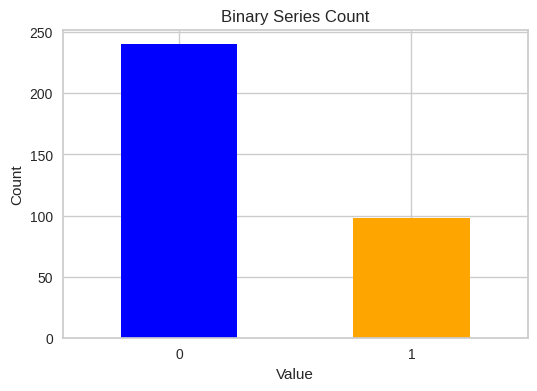

In [ ]:
binary_series = df_cleaned['Outcome']

# Count the occurrences of 0 and 1
count_values = binary_series.value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
count_values.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.title('Binary Series Count')
plt.xlabel('Value')
plt.ylabel('Count')

# Show the plot
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.show()

Using SMOTE to address the imbalanced data

Original class distribution: Outcome
0    193
1     77
Name: count, dtype: int64
Resampled class distribution: Outcome
1    193
0    193
Name: count, dtype: int64


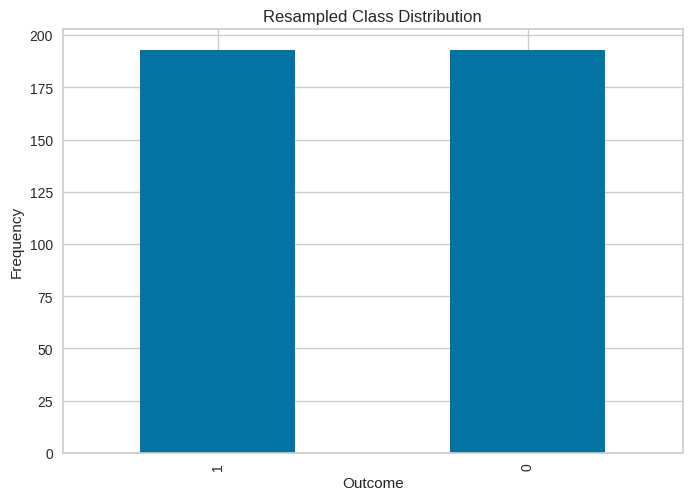

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_cleaned_resampled, y_cleaned_resampled = smote.fit_resample(X_cleaned_train, y_cleaned_train)

# Check the class distribution after resampling
print(f"Original class distribution: {y_cleaned_train.value_counts()}")
print(f"Resampled class distribution: {pd.Series(y_cleaned_resampled).value_counts()}")

# Plot the resampled class distribution
pd.Series(y_cleaned_resampled).value_counts().plot(kind='bar', title='Resampled Class Distribution')
plt.ylabel('Frequency')
plt.show()

Applied Smothe and Class Weights (Cost-sensitive Learning) and K-Fold

* **SMOTE** -  generates synthetic samples for the minority class by interpolating between existing samples. It helps balance the dataset by creating "new" data points rather than simply duplicating existing ones.

* **Class Weights** - By dividing by the class frequency, the weight is higher for underrepresented classes and lower for overrepresented classes.


## Part 9: Retest with SMOTE

In [ ]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

# Create KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Loop through each fold
for train_index, test_index in kf.split(X_cleaned):

  X_train, X_test = X_cleaned.iloc[train_index], X_cleaned.iloc[test_index]
  y_train, y_test = y_cleaned.iloc[train_index], y_cleaned.iloc[test_index]

  # Apply SMOTE to the training data in each fold
  X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

  # Train Logistic Regression model
  log_reg.fit(X_train_smote, y_train_smote)

  # Predict and evaluate the model
  y_pred = log_reg.predict(X_test)

  y_true = y_test

  # Create confusion matrix using pandas crosstab
  conf_matrix = pd.crosstab(pd.Series(y_true, name='Actual'), pd.Series(y_pred, name='Predicted'))

  # Extract TP, TN, FP, FN
  TP = conf_matrix.loc[1, 1] if 1 in conf_matrix.index and 1 in conf_matrix.columns else 0
  TN = conf_matrix.loc[0, 0] if 0 in conf_matrix.index and 0 in conf_matrix.columns else 0
  FP = conf_matrix.loc[0, 1] if 0 in conf_matrix.index and 1 in conf_matrix.columns else 0
  FN = conf_matrix.loc[1, 0] if 1 in conf_matrix.index and 0 in conf_matrix.columns else 0

  # Calculate metrics using custom functions
  accuracy_custom = custom_accuracy(TP, TN, FP, FN)
  precision_custom = custom_precision(TP, FP)
  recall_custom = custom_recall(TP, FN)
  specificity_custom = custom_specificity(TN, FP)
  f1_custom = custom_f1(precision_custom, recall_custom)

  # Now use sklearn's built-in functions for comparison
  accuracy_sklearn = accuracy_score(y_true, y_pred)
  precision_sklearn = precision_score(y_true, y_pred)
  recall_sklearn = recall_score(y_true, y_pred)
  f1_sklearn = f1_score(y_true, y_pred)

  # Compute Specificity using sklearn's confusion_matrix
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity_sklearn = tn / (tn + fp) if (tn + fp) != 0 else 0

  # Output the results
  print("Custom Metrics:")
  print(f"Accuracy: {accuracy_custom}")
  print(f"Precision: {precision_custom}")
  print(f"Recall: {recall_custom}")
  print(f"Specificity: {specificity_custom}")
  print(f"F1 Score: {f1_custom}")

  print("\nSklearn Metrics:")
  print(f"Accuracy: {accuracy_sklearn}")
  print(f"Precision: {precision_sklearn}")
  print(f"Recall: {recall_sklearn}")
  print(f"Specificity: {specificity_sklearn}")
  print(f"F1 Score: {f1_sklearn}")

  print("\n\n")



Custom Metrics:
Accuracy: 0.5
Precision: 0.0
Recall: 0.0
Specificity: 0.6666666666666666
F1 Score: 0

Sklearn Metrics:
Accuracy: 0.7647058823529411
Precision: 0.6086956521739131
Recall: 0.6666666666666666
Specificity: 0.8085106382978723
F1 Score: 0.6363636363636364



Custom Metrics:
Accuracy: 0.7142857142857143
Precision: 0.8
Recall: 0.8
Specificity: 0.5
F1 Score: 0.8000000000000002

Sklearn Metrics:
Accuracy: 0.7058823529411765
Precision: 0.4722222222222222
Recall: 0.9444444444444444
Specificity: 0.62
F1 Score: 0.6296296296296297



Custom Metrics:
Accuracy: 0.5
Precision: 0
Recall: 0.0
Specificity: 1.0
F1 Score: 0

Sklearn Metrics:
Accuracy: 0.7794117647058824
Precision: 0.6956521739130435
Recall: 0.6666666666666666
Specificity: 0.8409090909090909
F1 Score: 0.6808510638297872



Custom Metrics:
Accuracy: 0.8
Precision: 0.5
Recall: 1.0
Specificity: 0.75
F1 Score: 0.6666666666666666

Sklearn Metrics:
Accuracy: 0.8208955223880597
Precision: 0.7222222222222222
Recall: 0.65
Specificity: 

## Part 10: Retest with ROC-AUC

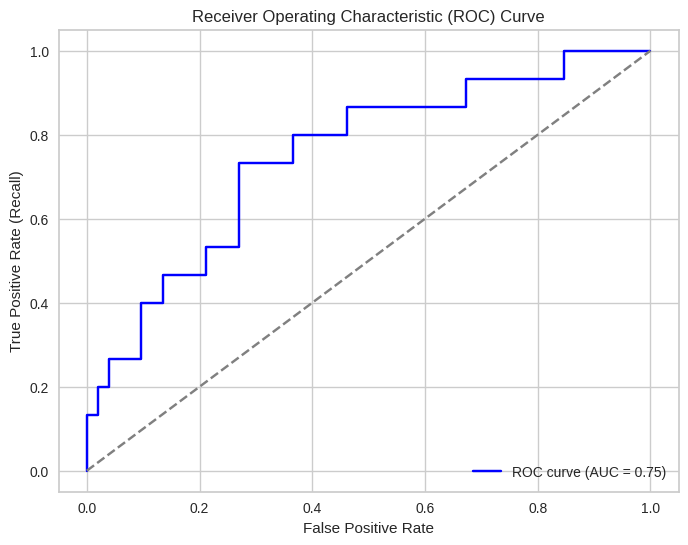

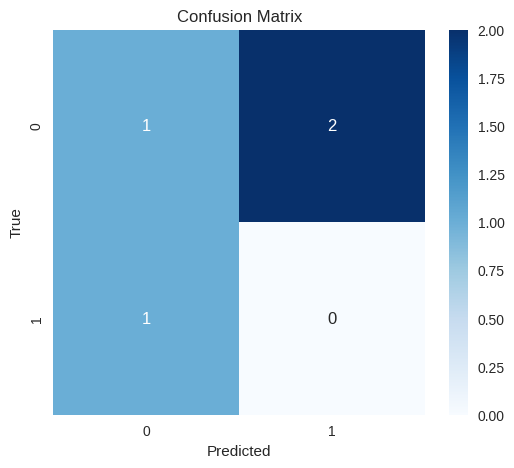

In [ ]:
# Generate ROC-AUC curve (for binary classification)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally, plot confusion matrix using seaborn heatmap
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Part 11: Reevaluate Feature Engineering

## Part 12: SVM, KNN, and Tree Model

In [ ]:
from sklearn.svm import SVC

# Define features and target
X_cleaned = df_cleaned[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].copy()
y_cleaned = df_cleaned['Outcome'].copy()

In [ ]:
# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Configure SVM model
svm_model = SVC(C=0.1, kernel='rbf', random_state=42)

# Loop through each fold
for train_index, test_index in kf.split(X_cleaned):

    # Train/test split
    X_train, X_test = X_cleaned.iloc[train_index], X_cleaned.iloc[test_index]
    y_train, y_test = y_cleaned.iloc[train_index], y_cleaned.iloc[test_index]

    # Scale the data (fit only on the training set)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE to the training data in each fold
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

    # Train the SVM model with RBF kernel (default)
    svm_model.fit(X_train_smote, y_train_smote)

    # Predict
    y_pred = svm_model.predict(X_test_scaled)

    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\n\n")


Confusion Matrix:
[[36 11]
 [ 6 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        47
           1       0.58      0.71      0.64        21

    accuracy                           0.75        68
   macro avg       0.72      0.74      0.72        68
weighted avg       0.77      0.75      0.76        68




Confusion Matrix:
[[29 21]
 [ 2 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72        50
           1       0.43      0.89      0.58        18

    accuracy                           0.66        68
   macro avg       0.68      0.73      0.65        68
weighted avg       0.80      0.66      0.68        68




Confusion Matrix:
[[37  7]
 [ 3 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        44
           1       0.75      0.88      0.81     

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_cleaned (features) and y_cleaned (labels) are already defined

# Initialize KFold for Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize list to store evaluation metrics
cv_scores = []

# Cross-validation loop
for train_index, test_index in kf.split(X_cleaned):
    # Split data into training and test sets for the current fold
    X_train, X_test = X_cleaned.iloc[train_index], X_cleaned.iloc[test_index]
    y_train, y_test = y_cleaned.iloc[train_index], y_cleaned.iloc[test_index]

    # Scale the features for the current fold (fit scaler on train data, transform both train and test data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Fit on train and transform train data
    X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform test data

    # Train the model on the scaled training data
    knn_model.fit(X_train_scaled, y_train)

    # Predict on the scaled test data
    y_pred = knn_model.predict(X_test_scaled)

    # Evaluate the model for the current fold
    fold_report = classification_report(y_test, y_pred, output_dict=True)
    cv_scores.append(fold_report)

# Calculate average evaluation metrics (e.g., precision, recall, F1-score)
avg_precision = np.mean([fold['1']['precision'] for fold in cv_scores])
avg_recall = np.mean([fold['1']['recall'] for fold in cv_scores])
avg_f1_score = np.mean([fold['1']['f1-score'] for fold in cv_scores])

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)

# Optionally, print confusion matrix for each fold:
for i, fold in enumerate(cv_scores, 1):
    print(f"\nConfusion Matrix for Fold {i}:")
    print(confusion_matrix(y_test, y_pred))


Average Precision: 0.6837480063795853
Average Recall: 0.5558730158730159
Average F1-Score: 0.5848368135132842

Confusion Matrix for Fold 1:
[[43  9]
 [ 5 10]]

Confusion Matrix for Fold 2:
[[43  9]
 [ 5 10]]

Confusion Matrix for Fold 3:
[[43  9]
 [ 5 10]]

Confusion Matrix for Fold 4:
[[43  9]
 [ 5 10]]

Confusion Matrix for Fold 5:
[[43  9]
 [ 5 10]]


### Tree Model

## Part 13: Create an ensemble model

## Part 14: Summarize your approach and discuss the full data science pipeline as well as what you went back and fixed based on your findings and then what your final model includes.